In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('../train.csv')
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
data[data['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [4]:
data[data['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [5]:
data.shape

(31962, 3)

In [6]:
data = data.drop(['id'], axis = 1)
data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [7]:
# label-distribution in the dataset
data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [9]:
# remove unwanted text patterns from the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

# Removing Twitter Handles (@user)

In [10]:
data['Tweets'] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*")
data.head()

,label,tweet,Tweets
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide: society now #motivation


# Removing Punctuations, Numbers, and Special Characters

In [11]:
data['Tweets'] = data['Tweets'].str.replace("[^a-zA-Z#]", " ")
data.head()

,label,tweet,Tweets
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide society now #motivation


In [12]:
data.shape

(31962, 3)

# Removing Short Words

In [13]:
# Removing Short Words
data['Tweets'] = data['Tweets'].apply(lambda x : ' '.join([w for w in x.split() if len(w) > 3]))
data.head()

,label,tweet,Tweets
0,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model love take with time
4,0,factsguide: society now #motivation,factsguide society #motivation


# Text Normalization

In [14]:
tokenized_tweet = data['Tweets'].apply(lambda x : x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Tweets, dtype: object

In [15]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x : [stemmer.stem(i) for i in x])

In [16]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
data['Tweets'] = tokenized_tweet
data.head()

,label,tweet,Tweets
0,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,0,bihday your majesty,bihday your majesti
3,0,#model i love u take with u all the time in ...,#model love take with time
4,0,factsguide: society now #motivation,factsguid societi #motiv


In [17]:
from sklearn.utils import resample
df_majority = data[data.label == 0]
df_minority = data[data.label == 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace = True,     # sample with replacement
                                 n_samples = len(df_majority),
                                 random_state = 123)
 
# Combine majority class with upsampled minority class
data = pd.concat([df_majority, df_minority_upsampled])
data.label.value_counts()

0    29720
1    29720
Name: label, dtype: int64

In [18]:
data.shape

(59440, 3)

# Understanding the common words used in the tweets: WordCloud
# 1.all words

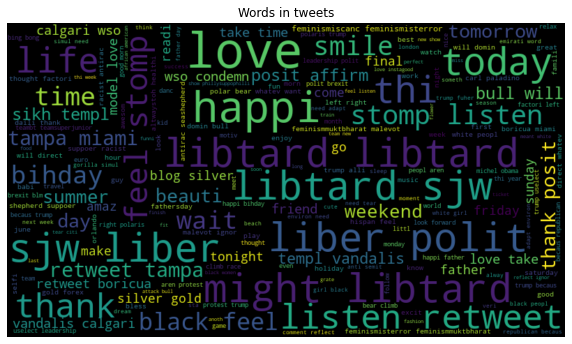

In [19]:
# Understanding the common words used in the tweets: WordCloud
# 1.all words
from wordcloud import WordCloud
all_words = ' '.join([text for text in data['Tweets']])  
wordcloud = WordCloud(width = 800, height = 450, random_state = 42, max_font_size = 70).generate(all_words) 
plt.figure(figsize=(10,7)) 
plt.imshow(wordcloud, interpolation = "bilinear") 
plt.title('Words in tweets')
plt.axis('off') 
plt.show()

# 2.Words in racist/sexist tweets

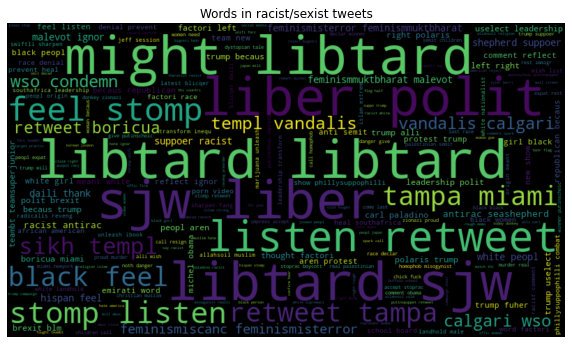

In [20]:
# 2.Words in racist/sexist tweets
negative_words =' '.join([text for text in data['Tweets'][data['label'] == 1]])
wordcloud = WordCloud(width = 800, height = 450, random_state = 42, max_font_size = 75).generate(negative_words)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title('Words in racist/sexist tweets')
plt.axis('off')
plt.show()

# 3.Words in non racist/sexist tweets

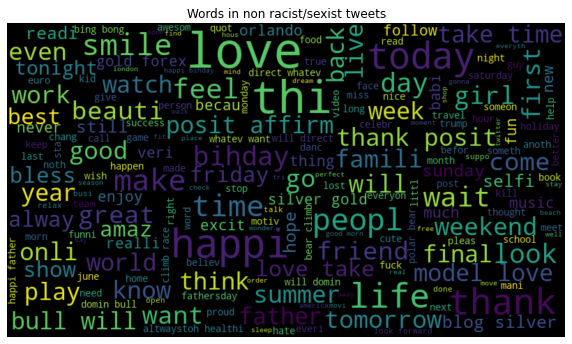

In [21]:
# 3.Words in non racist/sexist tweets
positive_words =' '.join([text for text in data['Tweets'][data['label'] == 0]])
wordcloud = WordCloud(width = 800, height = 450, random_state = 42, max_font_size = 70).generate(positive_words)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title('Words in non racist/sexist tweets')
plt.axis('off')
plt.show()

# 4.Understanding the impact of Hashtags on tweets sentiment

In [22]:
# 4.Understanding the impact of Hashtags on tweets sentiment
# function to collect hashtags
def hashtag_extract(x):
    hashtag = []
    # loop over the words
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtag.append(ht)
    return hashtag

# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(data['Tweets'][data['label'] == 0])
# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(data['Tweets'][data['label'] == 1])
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

# Non-Racist/Sexist Tweets

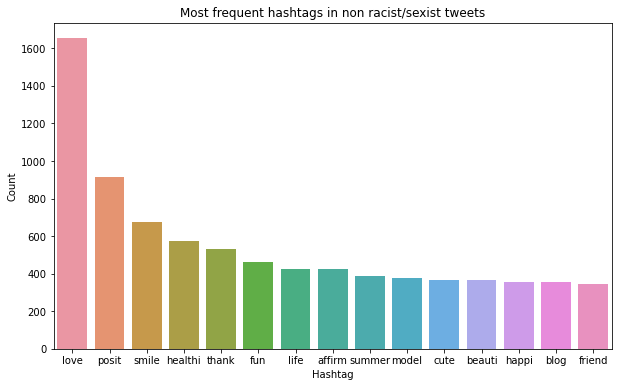

In [23]:
# Non-Racist/Sexist Tweets
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag' : list(a.keys()),
                 'count' : list(a.values())})
d = d.nlargest(columns = "count", n = 15)
plt.figure(figsize = (10,6))
ax = sns.barplot(data = d, x = 'Hashtag', y = "count")
ax.set(ylabel = 'Count')
plt.title('Most frequent hashtags in non racist/sexist tweets')
plt.show()

# Racist/Sexist Tweets

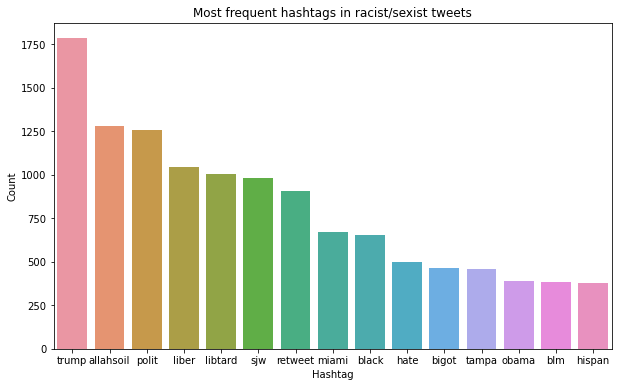

In [24]:
# Racist/Sexist Tweets
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag' : list(a.keys()),
                 'count' : list(a.values())})
d = d.nlargest(columns = "count", n = 15)
plt.figure(figsize = (10,6))
ax = sns.barplot(data = d, x = 'Hashtag', y = "count")
ax.set(ylabel = 'Count')
plt.title('Most frequent hashtags in racist/sexist tweets')
plt.show()

In [25]:
data.head()

,label,tweet,Tweets
0,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,0,bihday your majesty,bihday your majesti
3,0,#model i love u take with u all the time in ...,#model love take with time
4,0,factsguide: society now #motivation,factsguid societi #motiv


# train and test the data

In [26]:
# train and test the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['Tweets'], data['label'], test_size = 0.3, random_state = 42)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
train = cv.fit_transform(x_train)  #train the vectorizer, build the vocablury
test = cv.transform(x_test)  #get same encodings on test data as of vocabulary 

rf.fit(train, y_train)
predicted = rf.predict(test)

# Confusion matrix, accuracy score, classification report

In [28]:
# Confusion matrix, accuracy score, classification report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

r = confusion_matrix(y_test, predicted)
print(r)
ac = accuracy_score(y_test, predicted) * 100
print("Accuracy is : {:.0f}".format(ac))
f = f1_score(y_test, predicted)
print("F1-score is : {:.2f}".format(f))
print("True Positive Rate (TPR) : {:.2f}".format((r[0][0] / (r[0][0] + r[1][0])) * 100))
print("True Negative Rate (TNR) : {:.2f}".format((r[1][1] / (r[1][1] + r[0][1])) * 100))
print("False Negative Rate (FNR) : {:.2f}".format((r[1][0] / (r[1][0] + r[0][0])) * 100))
print("False Positive Rate (FPR) : {:.2f}".format((r[0][1] / (r[0][1] + r[1][1])) * 100))
c = (classification_report(y_test, predicted))
print(c)

[[8704  182]
 [  18 8928]]
Accuracy is : 99
F1-score is : 0.99
True Positive Rate (TPR) : 99.79
True Negative Rate (TNR) : 98.00
False Negative Rate (FNR) : 0.21
False Positive Rate (FPR) : 2.00
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      8886
           1       0.98      1.00      0.99      8946

    accuracy                           0.99     17832
   macro avg       0.99      0.99      0.99     17832
weighted avg       0.99      0.99      0.99     17832

